
* experimento almenos dos variantes / experimentos no tengan mucho default/ no se asigno variante / cant defaults
* cuantos usuarios/ cadena de navegacion termino el dia siguiente

* filtrar y mostrar experimenos invalidados o no tenidos en cuenta, imprimir análisis de al menos 4 experimentos diferentes...

In [1]:
# Preparamos el entorno
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt


import sys
import os
module_path = os.path.abspath(os.path.join('/Users/juanmanuelpaiba/Documents/Juan_Paiba/AB_Testing_Meli/', 'python_scripts'))
if module_path not in sys.path:
    sys.path.append(module_path)
import utilities

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#pd.set_option('display.width', 1000)

In [2]:
df_results = pd.read_csv("/Users/juanmanuelpaiba/Documents/Juan_Paiba/AB_Testing_Meli/data/Outputs/grouped_inf.csv", sep=",")
df_AB_test = pd.read_csv("/Users/juanmanuelpaiba/Documents/Juan_Paiba/AB_Testing_Meli/data/Outputs/data_test.csv", sep=",")

print(df_results.shape)
df_results.head()

(143, 7)


,date,experiment,variant,participants,purchases,buy_rate,buy_rate_percent
0,2021-08-01,HideTransitionModal,6646,2,0,0.000000,0.00%
1,2021-08-01,HideTransitionModal,6647,3,0,0.000000,0.00%
2,2021-08-01,HideTransitionModal,6993,5,0,0.000000,0.00%
3,2021-08-01,HideTransitionModal,DEFAULT,12,0,0.000000,0.00%
4,2021-08-01,address_hub,3574,189,143,0.756614,75.66%


In [3]:
print(df_AB_test.shape)
df_AB_test.head()

(154964, 7)


,date,experiment,variant,user_id,path,purchase_funnel_flag,item_id
0,2021-08-01,HideTransitionModal,6646,336575,mshops,0,0
1,2021-08-01,HideTransitionModal,6646,3677574,mshops,0,0
2,2021-08-01,HideTransitionModal,6647,2234611,mshops,0,0
3,2021-08-01,HideTransitionModal,6647,3023131,mshops,0,0
4,2021-08-01,HideTransitionModal,6647,9116431,mshops,0,0


In [4]:
df_results.experiment.value_counts()

experiment
HideTransitionModal                           8
best-seller-aa-testing-fail-fast-edition      6
carousel-v2p-above-the-fold                   6
sort-by-ranking                               6
viewItemPageMigrationDesktopReviewsNoTabs     4
viewItemPageMigrationDesktopQuotableSRV       4
viewItemPageMigrationReturns                  4
viewItemPageMigrationDesktopHirableSRV        4
web-layout-default-res                        4
recommended-products                          4
showV2V3BoxMessages                           4
show-pads-search-list                         4
show-pads-global                              4
shippingCalculatorMigrationModalExperiment    4
seller-reputation-change                      4
search-pads-none-desktop-mla                  4
results-target-web-motors                     4
remove-ecn-tag                                4
sa-on-vip                                     4
checkOnBehavior                               4
back-filters                 

In [5]:
df_results["buy_rate"] = df_results["buy_rate"].apply(lambda x: round(x, 2))
total_participants_per_day = df_results.groupby(['date', 'experiment'])['participants'].sum().reset_index()
total_participants_per_day.columns = ['date', 'experiment', 'total_participants']

# Merge the total participants with the original dataframe
df_results = df_results.merge(total_participants_per_day, on=['date', 'experiment'])
df_results['participation_percent'] = (df_results['participants'] / df_results['total_participants']) * 100

In [6]:
df_results[df_results.experiment == 'seller-reputation-change']

,date,experiment,variant,participants,purchases,buy_rate,buy_rate_percent,total_participants,participation_percent
42,2021-08-01,seller-reputation-change,4552,387,14,0.04,3.62%,1757,22.026181
43,2021-08-01,seller-reputation-change,4553,1370,75,0.05,5.47%,1757,77.973819
113,2021-08-02,seller-reputation-change,4552,1120,93,0.08,8.30%,5666,19.767031
114,2021-08-02,seller-reputation-change,4553,4546,321,0.07,7.06%,5666,80.232969


      date               experiment      variant participation_percent  participants buy_rate_percent  buy_rate
2021-08-01 seller-reputation-change [4552, 4553]        [22.03, 77.97]          1757   [3.62%, 5.47%]     0.045
2021-08-02 seller-reputation-change [4552, 4553]        [19.77, 80.23]          5666   [8.30%, 7.06%]     0.075

Population Stability Index (PSI) between first and second vectors: 0.003091971450058314


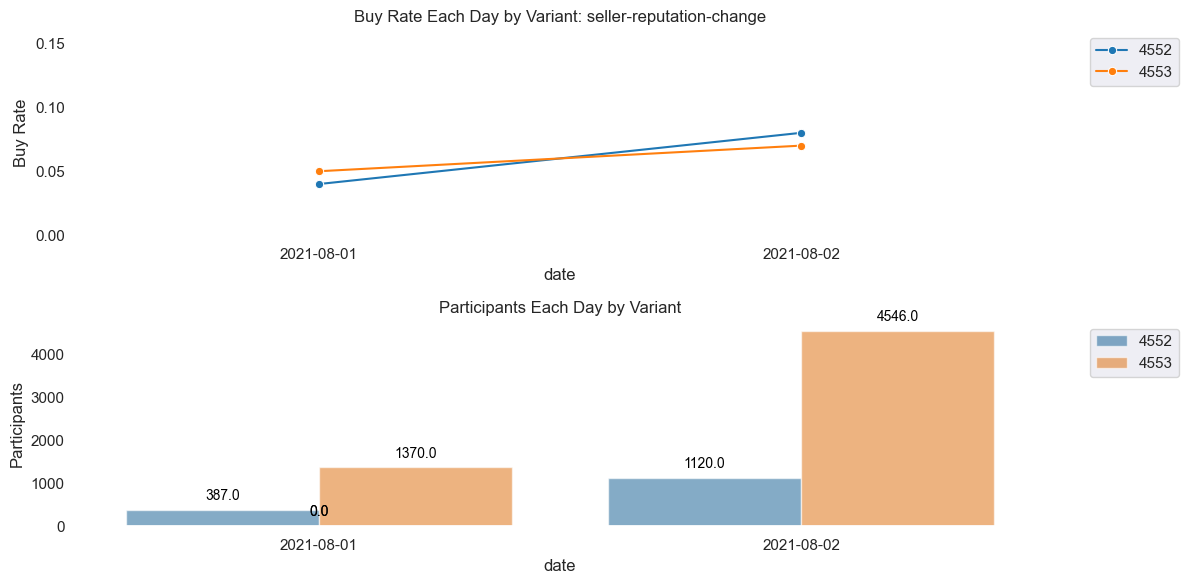

In [7]:
utilities.analisis_experimento(df = df_results,nombre_experimento='seller-reputation-change')

In [8]:
utilities.AB_test_discreto(df = df_AB_test,nombre_experimento='seller-reputation-change')

+-----------+-----------------------+-----------------+-------------------+-----------------+
|   variant | concentration         |   average_value |   prob_being_best |   expected_loss |
+===========+=======================+=================+===================+=================+
|      4552 | {0: 1400.0, 1: 107.0} |       0.071002  |           0.72675 |       0.0011898 |
+-----------+-----------------------+-----------------+-------------------+-----------------+
|      4553 | {0: 5520.0, 1: 396.0} |       0.0669371 |           0.27325 |       0.0057528 |
+-----------+-----------------------+-----------------+-------------------+-----------------+


In [9]:
utilities.AB_test_binario(df = df_AB_test,nombre_experimento='seller-reputation-change')

+-----------+----------+-------------+-----------------+------------------+-------------------+-----------------+
|   variant |   totals |   positives |   positive_rate |   posterior_mean |   prob_being_best |   expected_loss |
+===========+==========+=============+=================+==================+===================+=================+
|      4552 |     1507 |         107 |         0.071   |          0.07129 |           0.71835 |       0.0012165 |
+-----------+----------+-------------+-----------------+------------------+-------------------+-----------------+
|      4553 |     5916 |         396 |         0.06694 |          0.06701 |           0.28165 |       0.005572  |
+-----------+----------+-------------+-----------------+------------------+-------------------+-----------------+


In [10]:
#df_AB_test[df_AB_test.experiment == nombre_experimento].variant.unique()

In [11]:
#df_AB_test[(df_AB_test.experiment == nombre_experimento) &(df_AB_test.variant == '4552')].purchase_funnel_flag.values

In [12]:
#discrete_test.add_variant_data('4552', df_AB_test[(df_AB_test.experiment == nombre_experimento) &(df_AB_test.variant == '4552')].purchase_funnel_flag.values)
#discrete_test.add_variant_data('4553', df_AB_test[(df_AB_test.experiment == nombre_experimento) &(df_AB_test.variant == '4553')].purchase_funnel_flag.values)

In [13]:
#results_ealuation = discrete_test.evaluate()
#print(pd.DataFrame(results_ealuation).to_markdown(tablefmt="grid", index=False))

In [14]:
# Inatalamos el paquete que vamos a utilizar
#!pip install bayesian_testing